# <span style="color:#4CCFA2">[M6] 🧪 Lab - EDA Practice w/ Taxi Dataset</span> 🚕

The taxi dataset in Seaborn contains information related to taxi rides, such as pickup and drop-off locations, timestamps, trip distances, fares, and other relevant attributes. This dataset is commonly employed for practicing data visualization and exploratory data analysis (EDA) techniques using Seaborn and other Python data analysis libraries.


In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



## I. Read in the data

In [2]:
taxis = sns.load_dataset("taxis")

## II. First Look at the Data

In [3]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [5]:
taxis.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [6]:
taxis['trip_duration'] = taxis['dropoff'] - taxis['pickup']

# Convert trip_duration to minutes
taxis['trip_duration'] = taxis['trip_duration'].dt.total_seconds() / 60

# Round trip_duration to 2 decimal places
taxis['trip_duration'] = taxis['trip_duration'].round(2)

taxis.head()


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,6.25
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,7.08
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,7.40
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,25.87
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,9.53


       trip_duration    avg_speed
count    6416.000000  6416.000000
mean       14.387143    11.409800
std        11.636437     5.934716
min         0.050000     0.000000
25%         6.530000     7.563519
50%        10.930000    10.033964
75%        18.535000    13.679042
max       107.670000    54.227405


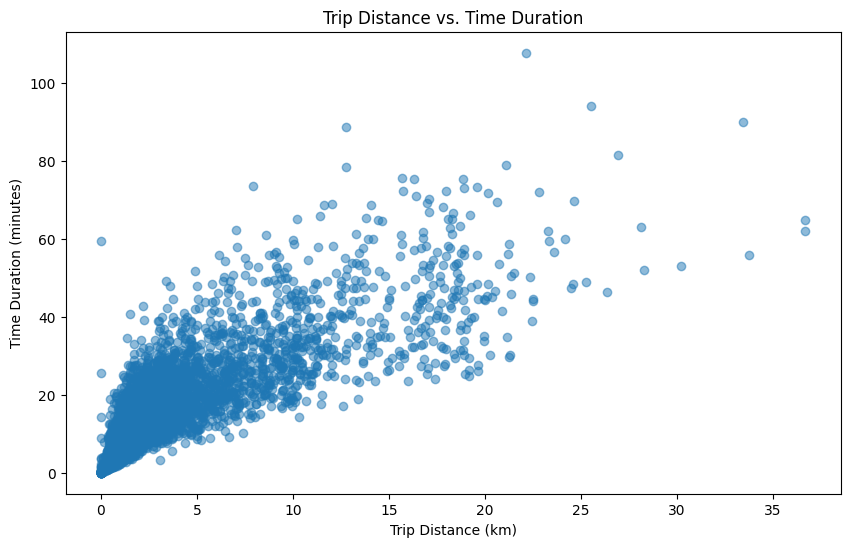

In [7]:
# Calculate average speed in km/h
taxis['avg_speed'] = (taxis['distance'] / taxis['trip_duration']) * 60

# Filter out unrealistic speeds (e.g., above 100 km/h)
taxis = taxis[taxis['avg_speed'] <= 100]

# Display summary statistics of trip_duration and avg_speed
print(taxis[['trip_duration', 'avg_speed']].describe())

# Create a scatter plot of trip distance vs. time duration
plt.figure(figsize=(10, 6))
plt.scatter(taxis['distance'], taxis['trip_duration'], alpha=0.5)
plt.xlabel('Trip Distance (km)')
plt.ylabel('Time Duration (minutes)')
plt.title('Trip Distance vs. Time Duration')
plt.show()

## III. Feature Engineering

Let's engineer some more features - What ideas do you have?

## IV. Exploratory Data Analysis

Please answer the following questions. Remember to include a markdown cell following each visualization to highlight the key insight derived from the visual representation!

1. **Passenger Count Analysis**:
   - **Question**: How does the number of passengers vary across taxi trips?
     - **Visualization**: Create a count plot showing the distribution of passenger counts.


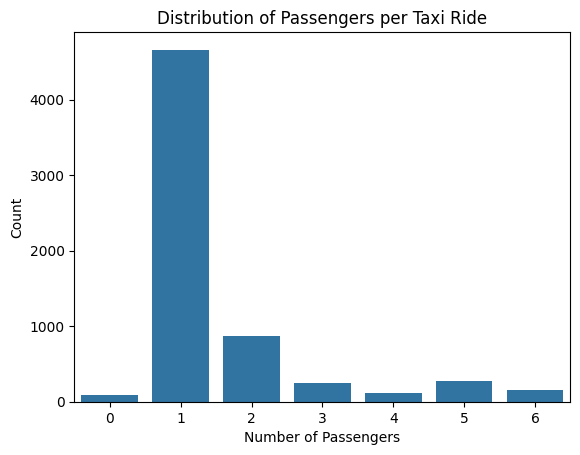

In [8]:
sns.countplot(x='passengers', data=taxis)
plt.title('Distribution of Passengers per Taxi Ride')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.show()



2. **Fare Analysis**:
   - **Question**: What is the range of fares for taxi rides?
     - **Visualization**: Plot a histogram to visualize the distribution of fares. Maybe play around with the binwidth.
     - **Follow Up Question**: After your visualization, can you filter your dataframe to identify the ride that had the largest fare?


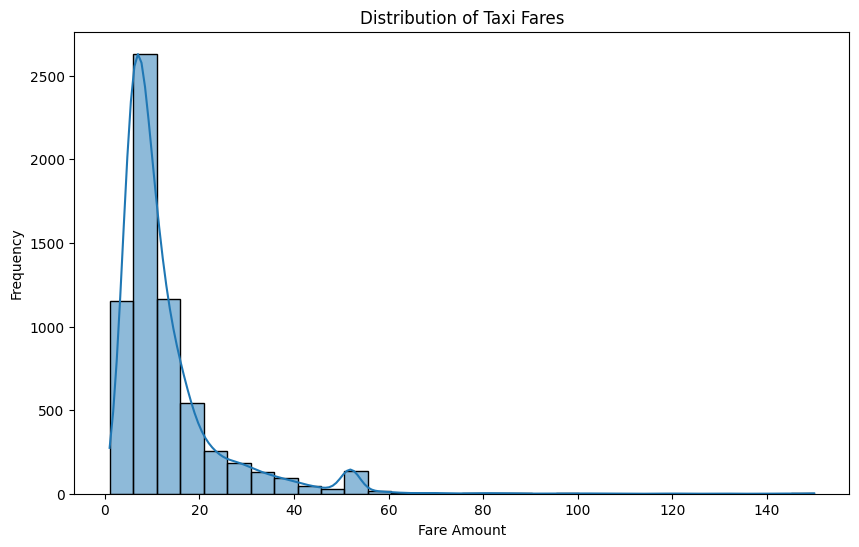

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(taxis['fare'], bins=30, kde=True)
plt.title('Distribution of Taxi Fares')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()


3. **Trip Duration Analysis**:
   - **Question**: How long are typical taxi trips?
     - **Visualization**: Create a histogram or box plot to show the distribution of trip durations.
   - **Question**: What is the average trip duration for each day of the week?
        - **Visualization**: Create a bar chart to show the average trip duration for each day. Put this in order from Monday - Sunday!




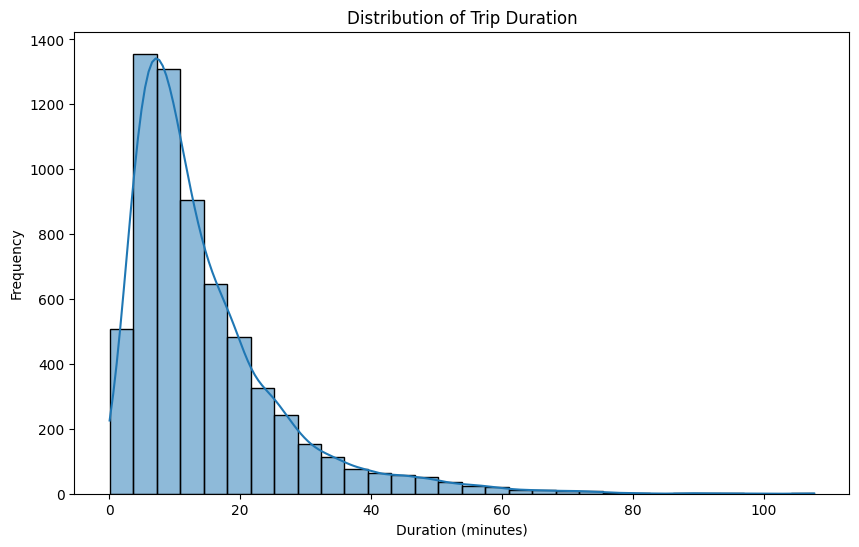

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(taxis['trip_duration'], bins=30, kde=True)
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

4. **Borough Analysis**:
   - **Question**: Which boroughs are the most common pickup locations?
     - **Visualization**: Plot a count plot to display the frequency of pickups in each borough.
   - **Question**: How many passengers get dropped off in the same borough as where they were picked up?
     - **Visualization**: Plot a count plot to display the frequency same_borough.



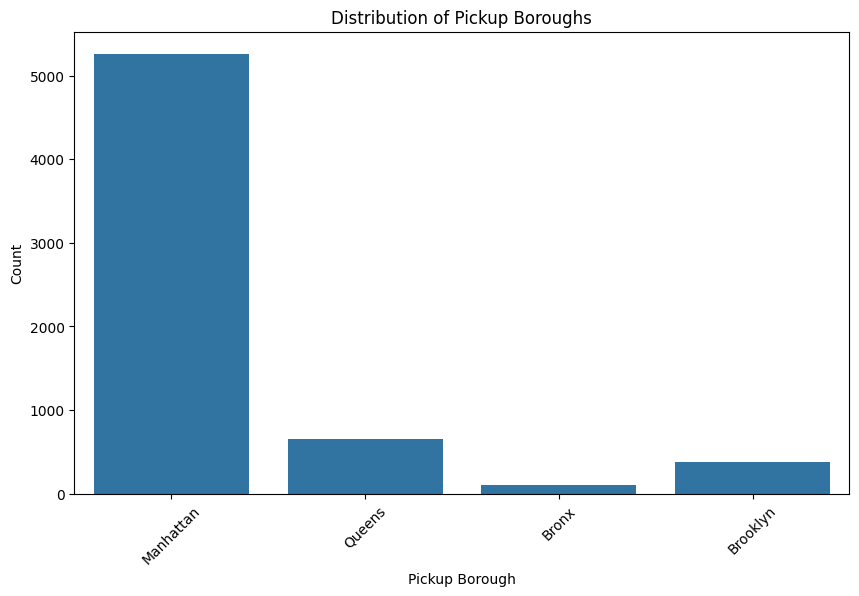

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_borough', data=taxis)
plt.title('Distribution of Pickup Boroughs')
plt.xlabel('Pickup Borough')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


5. **Time Analysis**:
   - **Question**: What are the busiest times for taxi rides?
     - **Visualization**: Create a count plot to show the number of trips per hour.

In [12]:
# Extract time from the 'pickup' timestamp
taxis['pickup_time'] = taxis['pickup'].dt.time

# Extract hour from the 'pickup' timestamp
taxis['pickup_hour'] = taxis['pickup'].dt.hour

# Extract hour from the 'dropoff' timestamp
taxis['dropoff_hour'] = taxis['dropoff'].dt.hour

# Display the first few rows to verify
taxis[['pickup', 'pickup_time', 'pickup_hour', 'dropoff', 'dropoff_time', 'dropoff_hour']].head()


KeyError: "['dropoff_time'] not in index"

In [ ]:
taxis.info()

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(taxis['pickup_hour'], bins=24, kde=False)
plt.title('Distribution of Pickup Times')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.show()


6. **Payment Analysis**:
   - **Question**: What are the most common payment methods used by passengers?
     - **Visualization**: Generate a count plot to visualize the distribution of payment methods.

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='payment', data=taxis)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




7. **Color Analysis**:
   - **Question**: Are there differences in fare amount based on taxi color?
     - **Visualization**: Create a box plot to compare fare amounts for different taxi colors.

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='fare',data=taxis)
plt.title('Boxplot of Fare Amounts by Taxi Color')
plt.xlabel('Taxi Color')
plt.ylabel('Fare')
plt.xticks(rotation=45)
plt.show()



8. **Anything Else to Explore?**:
   - Curious about any other trends you'd like to investigate? Add at least one more visualization of your choosing!

In [16]:
taxis['Same_borough'] = (taxis['pickup_borough'] == taxis['dropoff_borough']).astype('int')

In [17]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_duration,avg_speed,pickup_time,pickup_hour,dropoff_hour,Same_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,6.25,15.360000,20:21:09,20,20,1
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,7.08,6.694915,16:11:55,16,16,1
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,7.40,11.108108,17:53:01,17,18,1
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,25.87,17.858523,01:23:59,1,1,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,9.53,13.599161,13:27:42,13,13,1
